In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
_medeasy_df = pd.read_csv('all_medicine_and_drug_price_data(20k)_Bangladesh.csv')

In [3]:
_medeasy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19957 entries, 0 to 19956
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   medicine_name      19957 non-null  object 
 1   category_name      19956 non-null  object 
 2   slug               19957 non-null  object 
 3   generic_name       19949 non-null  object 
 4   strength           19037 non-null  object 
 5   manufacturer_name  19957 non-null  object 
 6   unit               19957 non-null  object 
 7   unit_size          19957 non-null  int64  
 8   price              19957 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.4+ MB


In [4]:
_medeasy_df.head(20)

medicine_name    category_name  \
0           Napa           Tablet   
1         Ceevit  Chewable Tablet   
2   Entacyd Plus           Tablet   
3   Entacyd Plus            Syrup   
4       Alben DS  Chewable Tablet   
5      Ceevit DS  Chewable Tablet   
6          Vasco  Chewable Tablet   
7     Nutrivit-C  Chewable Tablet   
8          Alben  Oral Suspension   
9          Almex  Chewable Tablet   
10       Ascobex  Chewable Tablet   
11  Ceevit Forte           Tablet   
12        Cevion           Tablet   
13       Ascoson        Injection   
14  Antanil Plus  Oral Suspension   
15         Vasco  Chewable Tablet   
16         Almex  Oral Suspension   
17     Oxecone-S  Oral Suspension   
18         Vasco            Syrup   
19  Flatameal DS  Oral Suspension   

                                                 slug  \
0                                  napa-500-mg-tablet   
1                       ceevit-250-mg-chewable-tablet   
2             entacyd-plus-400-mg-400-mg-30-mg-tablet   
3                 entacyd-plus-200-ml-oral-suspension   
4                     alben-ds-400-mg-chewable-tablet   
5                    ceevit-ds-500-mg-chewable-tablet   
6                        vasco-250-mg-chewable-tablet   
7                   nutrivit-c-250-mg-chewable-tablet   
8                         alben-10-ml-oral-suspension   
9                        almex-400-mg-chewable-tablet   
10                     ascobex-250-mg-chewable-tablet   
11                        ceevit-forte-1000-mg-tablet   
12                              cevion-1000-mg-tablet   
13                      ascoson-500-mg-5-ml-injection   
14  antanil-plus-200-mg-400-mg-30-mg-5-ml-oral-sus...   
15                       vasco-500-mg-chewable-tablet   
16                        almex-10-ml-oral-suspension   
17                   oxecone-s-200-ml-oral-suspension   
18                            vasco-100-mg-5-ml-syrup   
19  flatameal-ds-200-mg-400-mg-30-mg-5-ml-oral-sus...   

                                         generic_name  \
0                                         Paracetamol   
1                           Vitamin C [Ascorbic acid]   
2   Aluminium Hydroxide + Magnesium Hydroxide + Si...   
3   Aluminium Hydroxide + Magnesium Hydroxide + Si...   
4                                         Albendazole   
5                           Vitamin C [Ascorbic acid]   
6                           Vitamin C [Ascorbic acid]   
7                           Vitamin C [Ascorbic acid]   
8                                         Albendazole   
9                                         Albendazole   
10                          Vitamin C [Ascorbic acid]   
11                          Vitamin C [Ascorbic acid]   
12                          Vitamin C [Ascorbic acid]   
13                          Vitamin C [Ascorbic acid]   
14  Aluminium Hydroxide + Magnesium Hydroxide + Si...   
15                          Vitamin C [Ascorbic acid]   
16                                        Albendazole   
17  Aluminium Hydroxide + Magnesium Hydroxide + Si...   
18                          Vitamin C [Ascorbic acid]   
19  Aluminium Hydroxide + Magnesium Hydroxide + Si...   

                      strength               manufacturer_name           unit  \
0                       500 mg    Beximco Pharmaceuticals Ltd.          Piece   
1                       250 mg     Square Pharmaceuticals Ltd.          piece   
2                          NaN     Square Pharmaceuticals Ltd.          piece   
3                       200 ml     Square Pharmaceuticals Ltd.  200 ml bottle   
4                       400 mg         Eskayef Bangladesh Ltd.          piece   
5                       500 mg     Square Pharmaceuticals Ltd.          piece   
6                       250 mg             Opsonin Pharma Ltd.          piece   
7                       250 mg                     ACI Limited          piece   
8                        10 ml         Eskayef Bangladesh Ltd.   10 ml bottle   
9                  

In [5]:
_medeasy_df['price'] = _medeasy_df['price'].replace('No discounts', 0)
_medeasy_df['indian_price'] = 0.75 * _medeasy_df['price']
_medeasy_df.head()

medicine_name    category_name                                     slug  \
0          Napa           Tablet                       napa-500-mg-tablet   
1        Ceevit  Chewable Tablet            ceevit-250-mg-chewable-tablet   
2  Entacyd Plus           Tablet  entacyd-plus-400-mg-400-mg-30-mg-tablet   
3  Entacyd Plus            Syrup      entacyd-plus-200-ml-oral-suspension   
4      Alben DS  Chewable Tablet          alben-ds-400-mg-chewable-tablet   

                                        generic_name strength  \
0                                        Paracetamol   500 mg   
1                          Vitamin C [Ascorbic acid]   250 mg   
2  Aluminium Hydroxide + Magnesium Hydroxide + Si...      NaN   
3  Aluminium Hydroxide + Magnesium Hydroxide + Si...   200 ml   
4                                        Albendazole   400 mg   

              manufacturer_name           unit  unit_size  price  indian_price  
0  Beximco Pharmaceuticals Ltd.          Piece          1    1.2         0.900  
1   Square Pharmaceuticals Ltd.          piece          1    1.9         1.425  
2   Square Pharmaceuticals Ltd.          piece          1    2.5         1.875  
3   Square Pharmaceuticals Ltd.  200 ml bottle          1   80.0        60.000  
4       Eskayef Bangladesh Ltd.          piece          1    5.0         3.750

In [6]:
_medeasy_df.head(20)

medicine_name    category_name  \
0           Napa           Tablet   
1         Ceevit  Chewable Tablet   
2   Entacyd Plus           Tablet   
3   Entacyd Plus            Syrup   
4       Alben DS  Chewable Tablet   
5      Ceevit DS  Chewable Tablet   
6          Vasco  Chewable Tablet   
7     Nutrivit-C  Chewable Tablet   
8          Alben  Oral Suspension   
9          Almex  Chewable Tablet   
10       Ascobex  Chewable Tablet   
11  Ceevit Forte           Tablet   
12        Cevion           Tablet   
13       Ascoson        Injection   
14  Antanil Plus  Oral Suspension   
15         Vasco  Chewable Tablet   
16         Almex  Oral Suspension   
17     Oxecone-S  Oral Suspension   
18         Vasco            Syrup   
19  Flatameal DS  Oral Suspension   

                                                 slug  \
0                                  napa-500-mg-tablet   
1                       ceevit-250-mg-chewable-tablet   
2             entacyd-plus-400-mg-400-mg-30-mg-tablet   
3                 entacyd-plus-200-ml-oral-suspension   
4                     alben-ds-400-mg-chewable-tablet   
5                    ceevit-ds-500-mg-chewable-tablet   
6                        vasco-250-mg-chewable-tablet   
7                   nutrivit-c-250-mg-chewable-tablet   
8                         alben-10-ml-oral-suspension   
9                        almex-400-mg-chewable-tablet   
10                     ascobex-250-mg-chewable-tablet   
11                        ceevit-forte-1000-mg-tablet   
12                              cevion-1000-mg-tablet   
13                      ascoson-500-mg-5-ml-injection   
14  antanil-plus-200-mg-400-mg-30-mg-5-ml-oral-sus...   
15                       vasco-500-mg-chewable-tablet   
16                        almex-10-ml-oral-suspension   
17                   oxecone-s-200-ml-oral-suspension   
18                            vasco-100-mg-5-ml-syrup   
19  flatameal-ds-200-mg-400-mg-30-mg-5-ml-oral-sus...   

                                         generic_name  \
0                                         Paracetamol   
1                           Vitamin C [Ascorbic acid]   
2   Aluminium Hydroxide + Magnesium Hydroxide + Si...   
3   Aluminium Hydroxide + Magnesium Hydroxide + Si...   
4                                         Albendazole   
5                           Vitamin C [Ascorbic acid]   
6                           Vitamin C [Ascorbic acid]   
7                           Vitamin C [Ascorbic acid]   
8                                         Albendazole   
9                                         Albendazole   
10                          Vitamin C [Ascorbic acid]   
11                          Vitamin C [Ascorbic acid]   
12                          Vitamin C [Ascorbic acid]   
13                          Vitamin C [Ascorbic acid]   
14  Aluminium Hydroxide + Magnesium Hydroxide + Si...   
15                          Vitamin C [Ascorbic acid]   
16                                        Albendazole   
17  Aluminium Hydroxide + Magnesium Hydroxide + Si...   
18                          Vitamin C [Ascorbic acid]   
19  Aluminium Hydroxide + Magnesium Hydroxide + Si...   

                      strength               manufacturer_name           unit  \
0                       500 mg    Beximco Pharmaceuticals Ltd.          Piece   
1                       250 mg     Square Pharmaceuticals Ltd.          piece   
2                          NaN     Square Pharmaceuticals Ltd.          piece   
3                       200 ml     Square Pharmaceuticals Ltd.  200 ml bottle   
4                       400 mg         Eskayef Bangladesh Ltd.          piece   
5                       500 mg     Square Pharmaceuticals Ltd.          piece   
6                       250 mg             Opsonin Pharma Ltd.          piece   
7                       250 mg                     ACI Limited          piece   
8                        10 ml         Eskayef Bangladesh Ltd.   10 ml bottle   
9                  

In [7]:
_medeasy_df['indian_price'].astype(str).astype(float)
_medeasy_df.dtypes

medicine_name         object
category_name         object
slug                  object
generic_name          object
strength              object
manufacturer_name     object
unit                  object
unit_size              int64
price                float64
indian_price         float64
dtype: object

In [8]:
_medeasy_df['indian_price']= pd.to_numeric(_medeasy_df['indian_price'])
_medeasy_df.dtypes

medicine_name         object
category_name         object
slug                  object
generic_name          object
strength              object
manufacturer_name     object
unit                  object
unit_size              int64
price                float64
indian_price         float64
dtype: object

In [9]:
_medeasy_df.head(10)

medicine_name    category_name                                     slug  \
0          Napa           Tablet                       napa-500-mg-tablet   
1        Ceevit  Chewable Tablet            ceevit-250-mg-chewable-tablet   
2  Entacyd Plus           Tablet  entacyd-plus-400-mg-400-mg-30-mg-tablet   
3  Entacyd Plus            Syrup      entacyd-plus-200-ml-oral-suspension   
4      Alben DS  Chewable Tablet          alben-ds-400-mg-chewable-tablet   
5     Ceevit DS  Chewable Tablet         ceevit-ds-500-mg-chewable-tablet   
6         Vasco  Chewable Tablet             vasco-250-mg-chewable-tablet   
7    Nutrivit-C  Chewable Tablet        nutrivit-c-250-mg-chewable-tablet   
8         Alben  Oral Suspension              alben-10-ml-oral-suspension   
9         Almex  Chewable Tablet             almex-400-mg-chewable-tablet   

                                        generic_name strength  \
0                                        Paracetamol   500 mg   
1                          Vitamin C [Ascorbic acid]   250 mg   
2  Aluminium Hydroxide + Magnesium Hydroxide + Si...      NaN   
3  Aluminium Hydroxide + Magnesium Hydroxide + Si...   200 ml   
4                                        Albendazole   400 mg   
5                          Vitamin C [Ascorbic acid]   500 mg   
6                          Vitamin C [Ascorbic acid]   250 mg   
7                          Vitamin C [Ascorbic acid]   250 mg   
8                                        Albendazole    10 ml   
9                                        Albendazole   400 mg   

              manufacturer_name           unit  unit_size  price  indian_price  
0  Beximco Pharmaceuticals Ltd.          Piece          1   1.20         0.900  
1   Square Pharmaceuticals Ltd.          piece          1   1.90         1.425  
2   Square Pharmaceuticals Ltd.          piece          1   2.50         1.875  
3   Square Pharmaceuticals Ltd.  200 ml bottle          1  80.00        60.000  
4       Eskayef Bangladesh Ltd.          piece          1   5.00         3.750  
5   Square Pharmaceuticals Ltd.          piece          1   3.50         2.625  
6           Opsonin Pharma Ltd.          piece          1   1.90         1.425  
7                   ACI Limited          piece          1   1.90         1.425  
8       Eskayef Bangladesh Ltd.   10 ml bottle          1  23.00        17.250  
9   Square Pharmaceuticals Ltd.          piece          1   5.02         3.765

In [10]:
_medeasy_df.describe()

unit_size          price   indian_price
count  19957.000000   19957.000000   19957.000000
mean       2.369745     346.113158     259.584869
std        5.847054    4316.214965    3237.161224
min        1.000000       0.000000       0.000000
25%        1.000000       7.000000       5.250000
50%        1.000000      26.000000      19.500000
75%        1.000000     100.000000      75.000000
max      250.000000  340000.000000  255000.000000

In [11]:
def split_the_type_of_pack(txt):
    if txt.split()[-2] == "capsule":
        txt = txt.split()[-2]
    else:
        txt = txt.split()[-1]
    return txt

In [12]:
_medeasy_df.columns

Index(['medicine_name', 'category_name', 'slug', 'generic_name', 'strength',
       'manufacturer_name', 'unit', 'unit_size', 'price', 'indian_price'],
      dtype='object')

<Axes: ylabel='Frequency'>

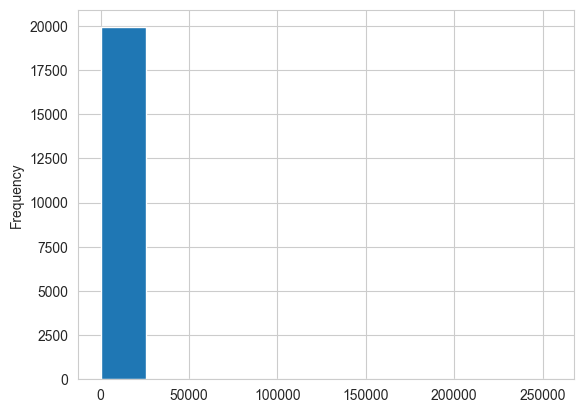

In [13]:
_medeasy_df['indian_price'].plot(kind = 'hist', bins = 10)

C:\Users\aryan\AppData\Local\Temp\ipykernel_11872\2990962320.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(_medeasy_df['indian_price'])


<Axes: xlabel='indian_price', ylabel='Density'>

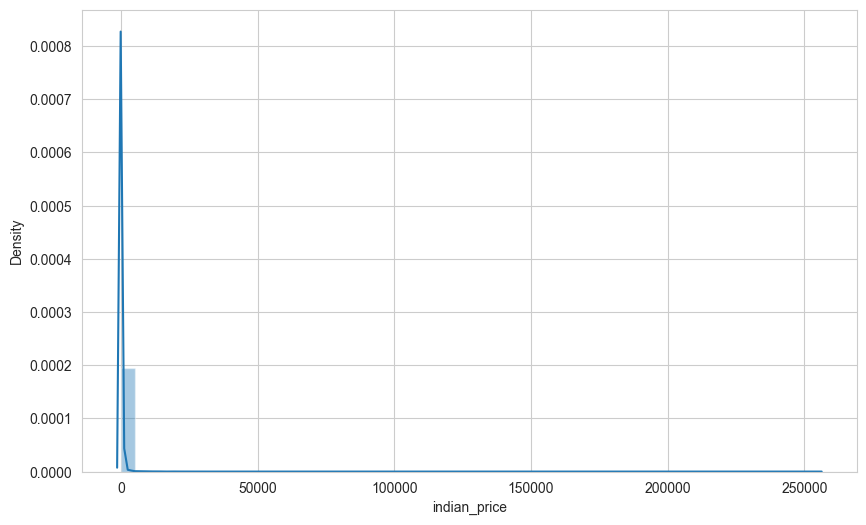

In [14]:
plt.figure(figsize=(10, 6))
sns.distplot(_medeasy_df['indian_price'])

<Axes: xlabel='count', ylabel='category_name'>

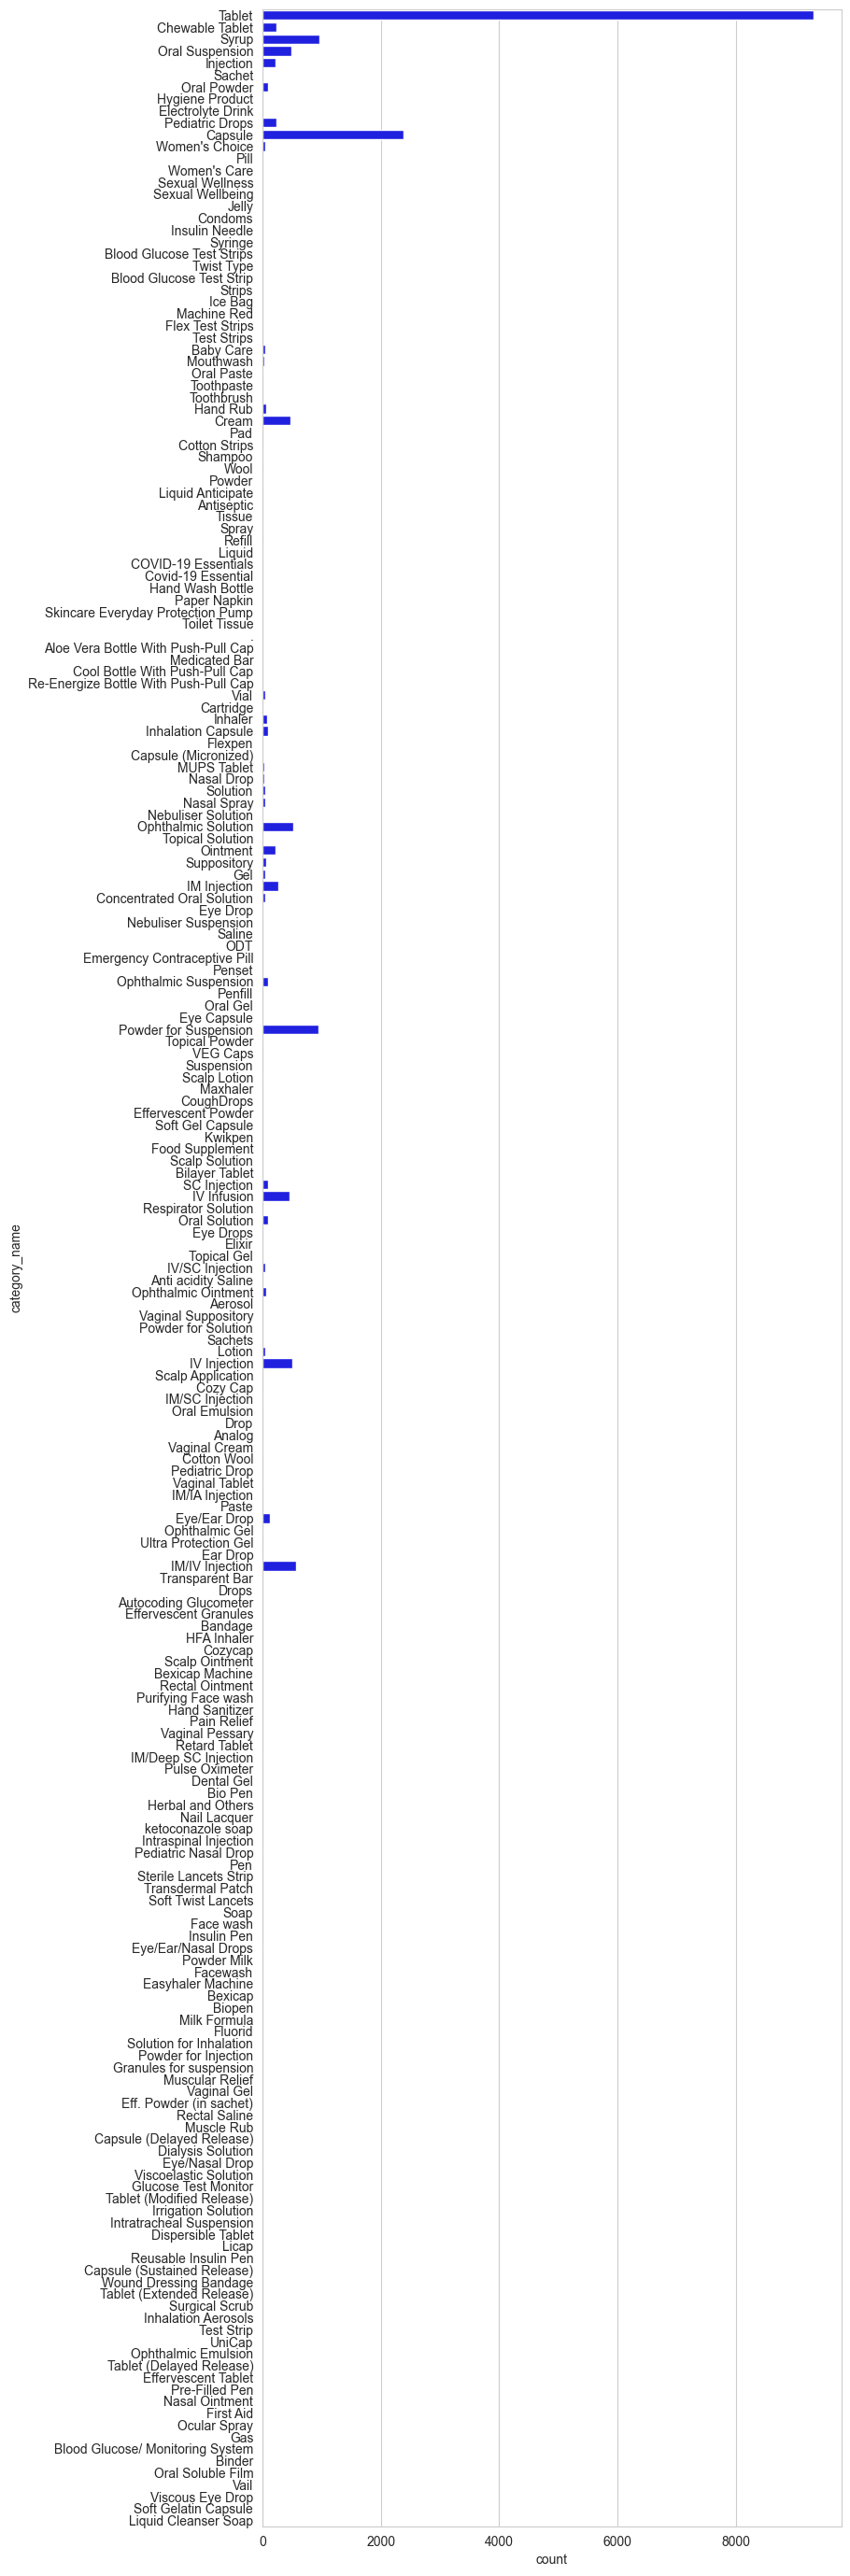

In [15]:
plt.figure(figsize=(8, 35))
sns.countplot(y = _medeasy_df['category_name'], color = 'Blue')

<Axes: xlabel='indian_price', ylabel='category_name'>

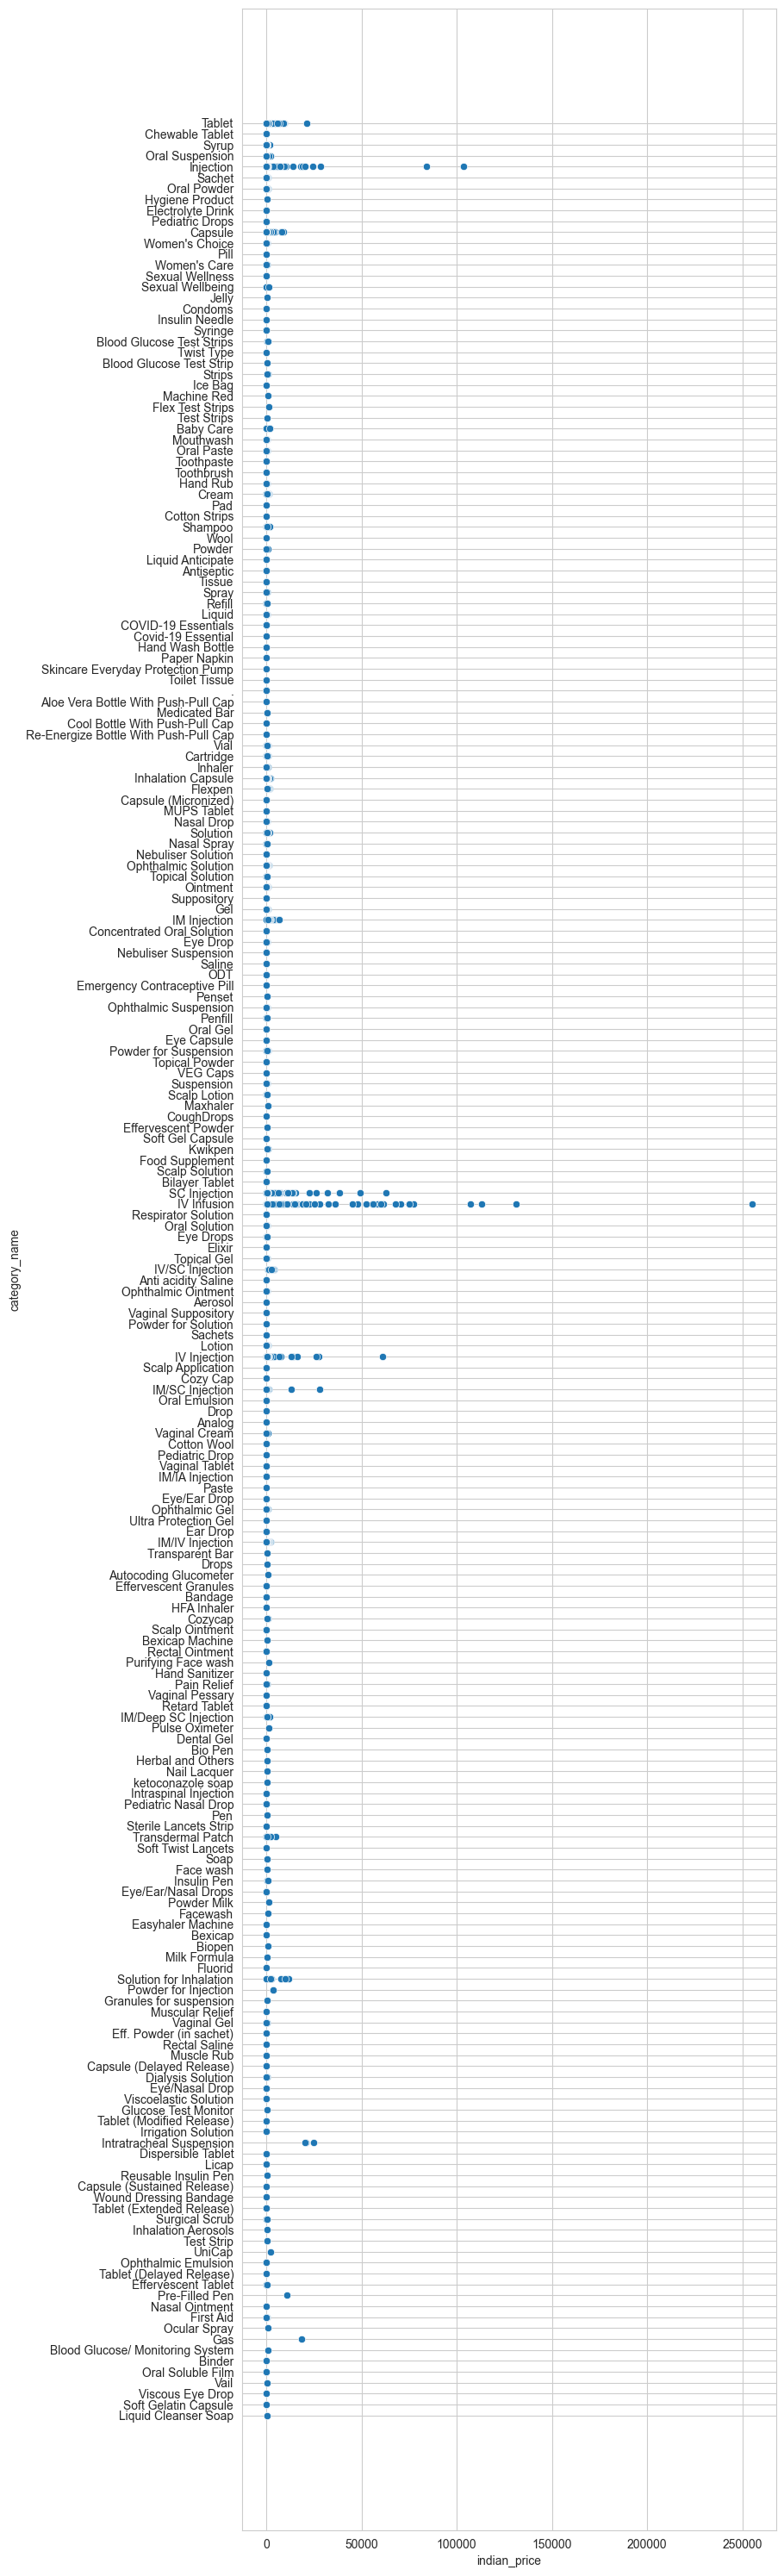

In [16]:
plt.figure(figsize = (8, 38))
sns.scatterplot(x = _medeasy_df['indian_price'], y = _medeasy_df['category_name'])

<Axes: xlabel='unit_size', ylabel='indian_price'>

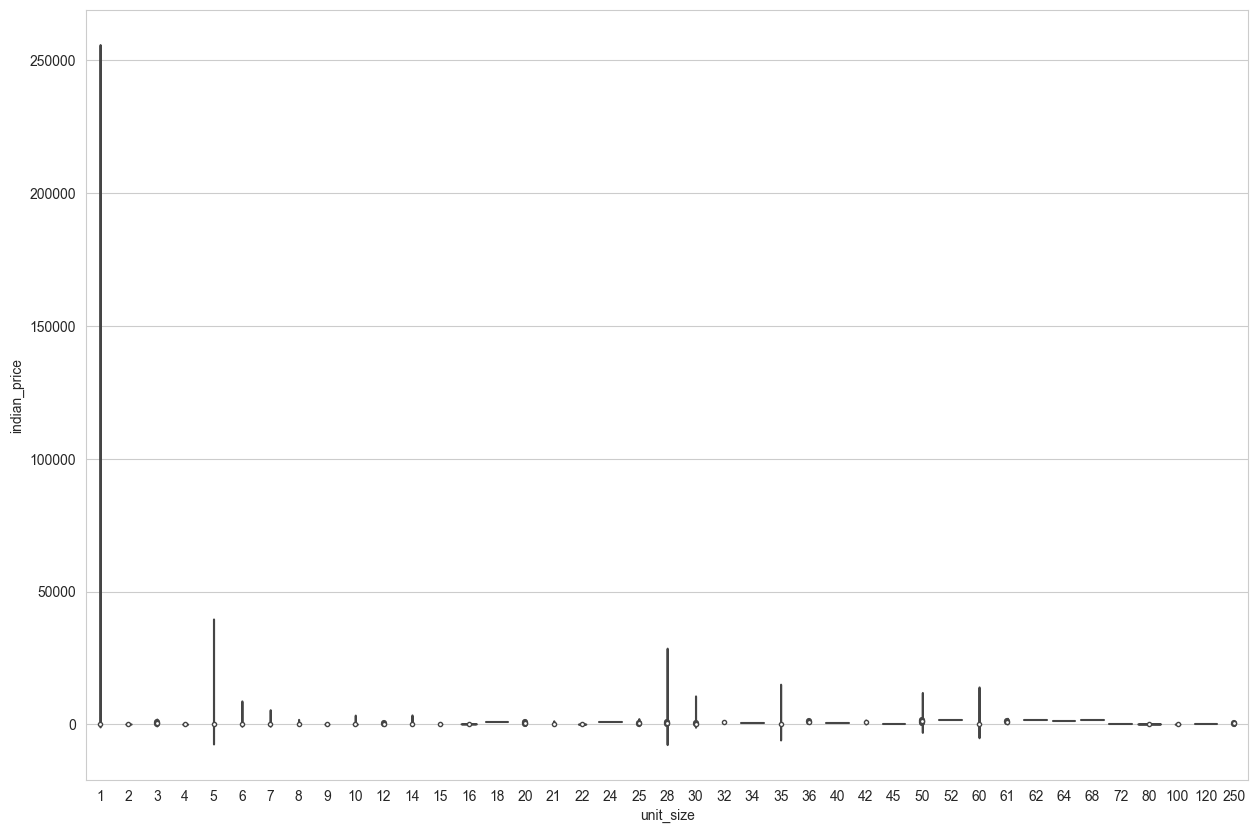

In [17]:
plt.figure(figsize=(15, 10))
sns.violinplot(y = _medeasy_df['indian_price'], x = _medeasy_df['unit_size'])

<Axes: xlabel='indian_price', ylabel='unit_size'>

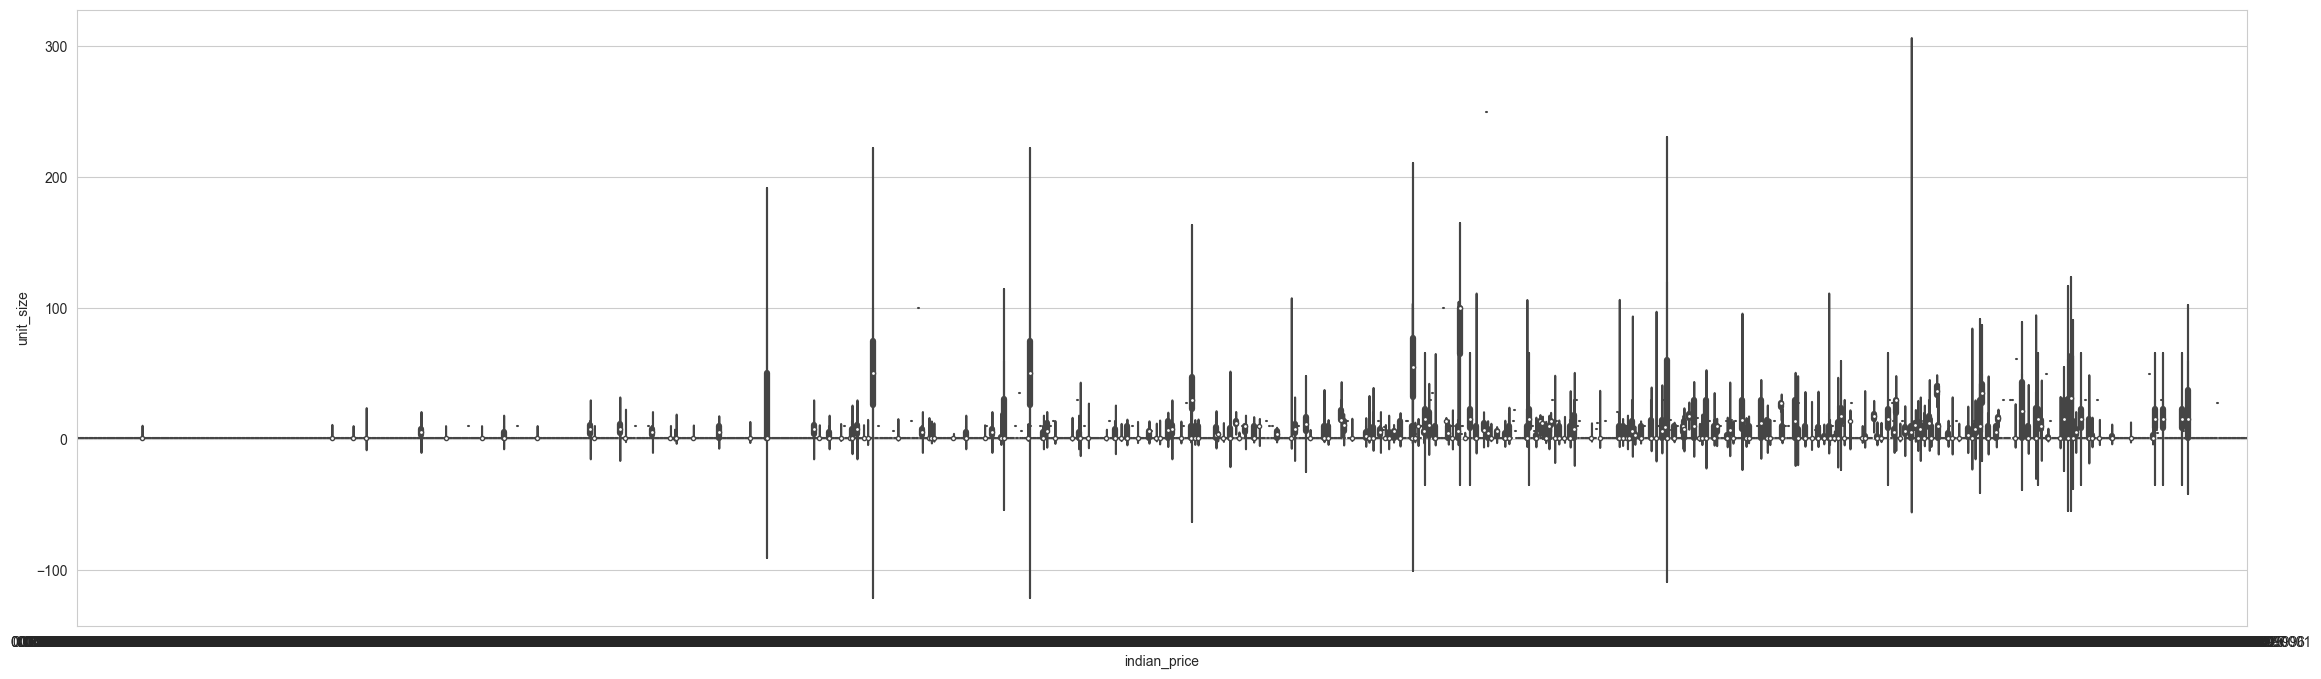

In [18]:
plt.figure(figsize=(28, 8))
sns.violinplot(y = _medeasy_df['unit_size'], x = _medeasy_df['indian_price'])

<Axes: xlabel='unit', ylabel='unit_size'>

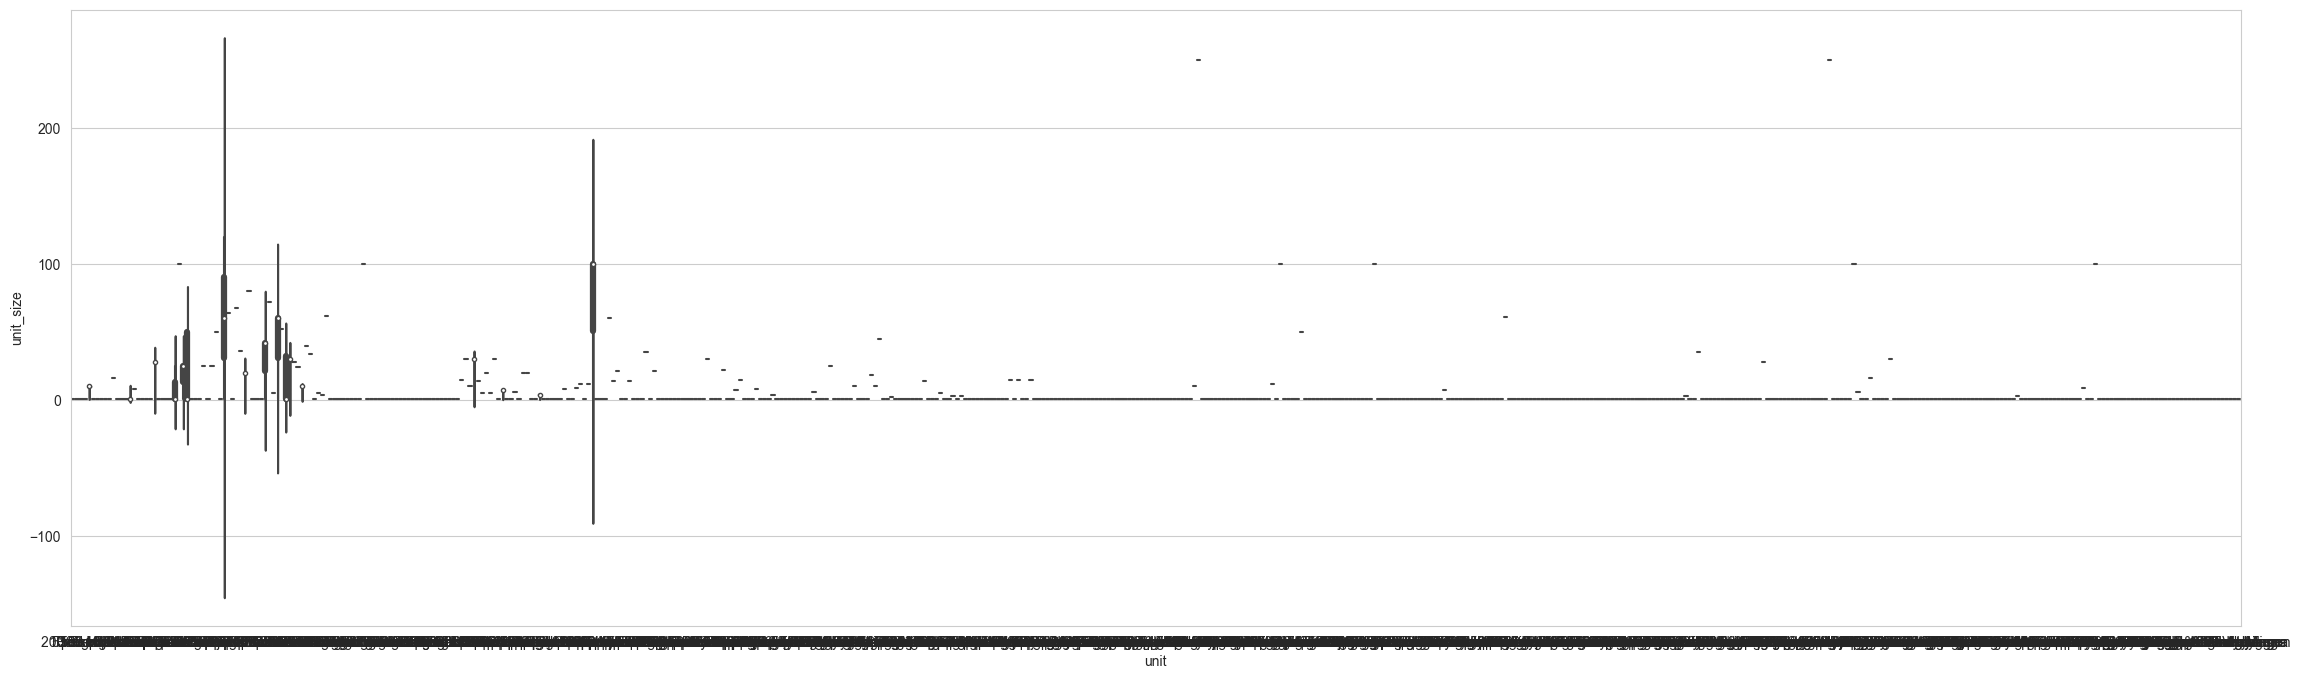

In [19]:
plt.figure(figsize=(28, 8))
sns.violinplot(y = _medeasy_df['unit_size'], x = _medeasy_df['unit'])

In [20]:
px.scatter(x = _medeasy_df['indian_price'], y = _medeasy_df['category_name'], color = _medeasy_df['unit'])

In [21]:
px.scatter(_medeasy_df['indian_price'], color = _medeasy_df['category_name'])

In [22]:
px.scatter(_medeasy_df['indian_price'], color = _medeasy_df['unit'])

In [23]:
px.scatter(_medeasy_df['unit'], color = _medeasy_df['indian_price'])

In [24]:
px.scatter(_medeasy_df['indian_price'], color = _medeasy_df['generic_name'])

In [25]:
px.scatter(_medeasy_df['indian_price'], color = _medeasy_df['strength'])

In [26]:
px.scatter(_medeasy_df['strength'], color = _medeasy_df['indian_price'])

In [27]:
_medeasy_df.to_csv('medEasy.csv')